In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

<Axes: xlabel='job_title_short'>

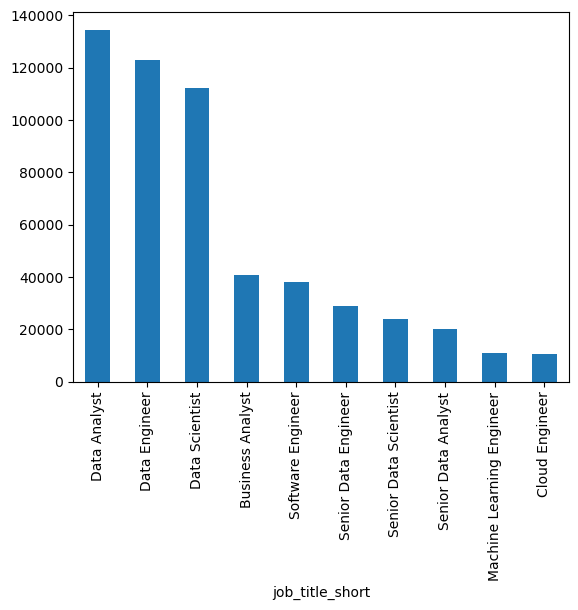

In [9]:
fig, ax = plt.subplots()

df_clean['job_title_short'].value_counts().plot(kind='bar',ax=ax)

In [10]:
df_clean['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     479390
Contractor     26136
Internship      6665
Name: count, dtype: int64

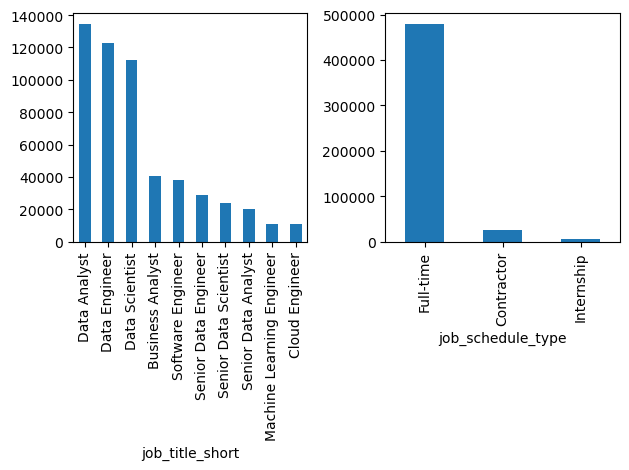

In [14]:
fig, ax = plt.subplots(1, 2)

df_clean['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df_clean['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [17]:
df_skills = df.copy()
df_skills['job_skills'] = df_skills['job_skills'].apply(lambda skills:ast.literal_eval(skills) if pd.notna(skills) else skills)
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(by=['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [18]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

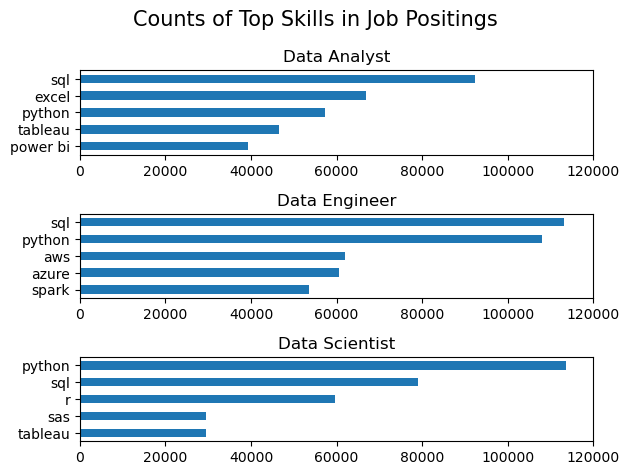

In [40]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Top Skills in Job Positings', fontsize=15)
fig.tight_layout()